In [28]:
from sklearn.datasets import fetch_mldata
from sklearn import preprocessing
import numpy as np
import numpy.random as random
from src.pytorch_cl_vae.model import ClVaeModel
import matplotlib.pyplot as plt
import torch
%matplotlib inline

## 1 - Load the model

In [5]:
fname = '../data/models/cl_vae_mnist_09_15_2018_03_06_PM.pt'
model = ClVaeModel.load_from_ckpt(fname)

## 2 - Load MNIST

In [7]:
datadir = '../data'
mnist = fetch_mldata('MNIST original', data_home=datadir)
mnist.data = mnist.data / 255
num_samples, input_dim = mnist.data.shape
num_classes = len(np.unique(mnist.target))
lb = preprocessing.LabelBinarizer()
lb.fit(mnist.target)
print('MNIST db has been successfully loaded, stored in the: "{}"'.format(datadir + '/mldata'))

MNIST db has been successfully loaded, stored in the: "../data/mldata"


## 3 - Get some examples to work with

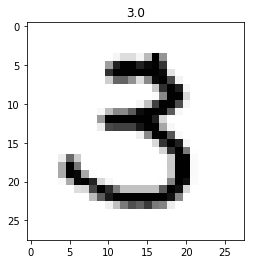

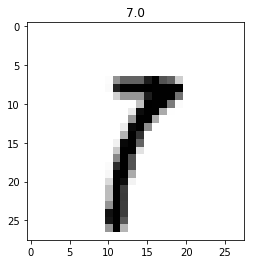

In [57]:
num_examples = 2
idxs = random.randint(0, num_samples-1, num_examples)
x = mnist.data[idxs]
y = mnist.target[idxs]
y_probs = lb.transform(y)
for i in range(x.shape[0]):
    plt.figure()
    img = x[i].reshape([int(np.sqrt(x.shape[-1]))]*2)
    plt.title(y[i])
    plt.imshow(img, cmap='Greys')
    
plt.show()

## 4 - Reconstruction check

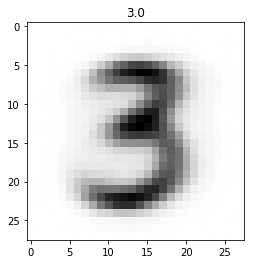

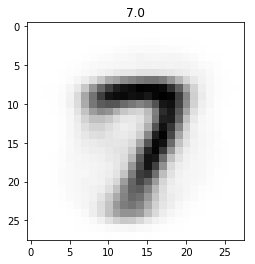

In [58]:
# Encode
x_batch = torch.from_numpy(x).float()
ws_batch = [torch.from_numpy(y_probs).float()]

z, _, _ = model.encode(x_batch, ws_batch)
x_decoded = model.decode(z, ws_batch)

x_decoded = x_decoded.detach().numpy()

for i in range(x_decoded.shape[0]):
    plt.figure()
    img = x_decoded[i].reshape([int(np.sqrt(x_decoded.shape[-1]))]*2)
    plt.title(y[i])
    plt.imshow(img, cmap='Greys')
    
plt.show()

## 5 - Generate with fixed ws

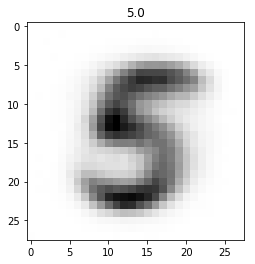

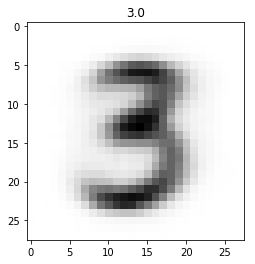

In [42]:
z_random = random.normal(size=(z.shape))
z_random = torch.from_numpy(z_random).float()

x_decoded = model.decode(z_random, ws_batch)

x_decoded = x_decoded.detach().numpy()

for i in range(x_decoded.shape[0]):
    plt.figure()
    img = x_decoded[i].reshape([int(np.sqrt(x_decoded.shape[-1]))]*2)
    plt.title(y[i])
    plt.imshow(img, cmap='Greys')
    
plt.show()

## 6 - Generate with fixed z

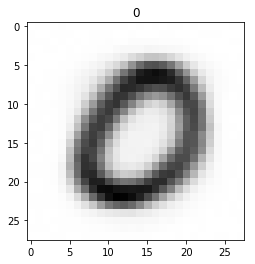

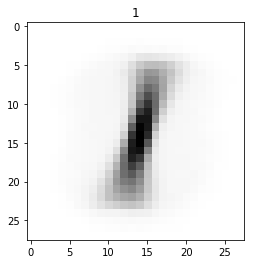

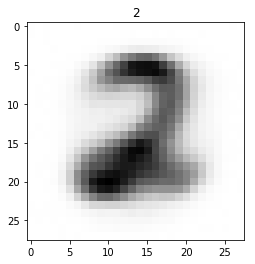

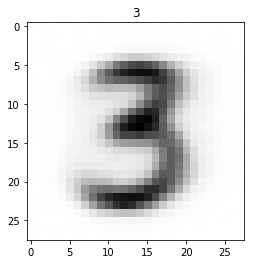

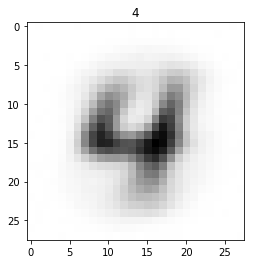

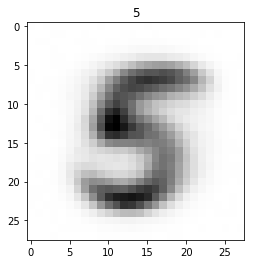

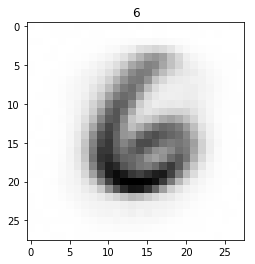

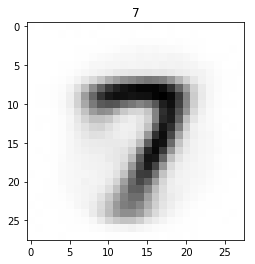

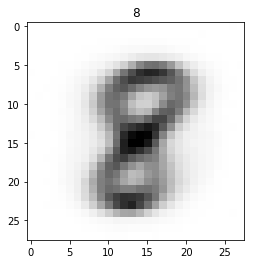

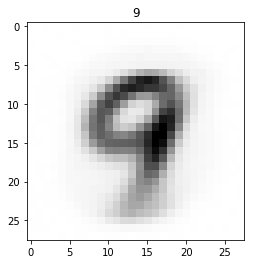

In [55]:
ws_random = np.identity(ws_batch[0].shape[-1])
z_fixed = np.tile(random.normal(size=(z[-1].shape)), (ws_random.shape[0], 1))

ws_random = [torch.from_numpy(ws_random).float()]
z_fixed = torch.from_numpy(z_fixed).float()
x_decoded = model.decode(z_fixed, ws_random)
x_decoded = x_decoded.detach().numpy()

for i in range(x_decoded.shape[0]):
    plt.figure()
    img = x_decoded[i].reshape([int(np.sqrt(x_decoded.shape[-1]))]*2)
    plt.title(i)
    plt.imshow(img, cmap='Greys')
    
plt.show()